# Project 3 - PINN ...
## Diffusion equation for $u = u(x,t)$
Solving $$\partial_{t}u(x,t) - \partial_{xx}u(x,t) = f(x,t) $$

## Solving the PDE using a TensorFlow-implementation
Based on implementation from ... 

#### Program imports and defaults

In [1]:
from PDEq import *
from support import *
from network import *
from networkFlowTorch import *

import autograd.numpy as anp
from autograd import elementwise_grad

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

## Random seed
default_seed = 15; anp.random.seed(default_seed)

## Figure defaults
plt.rcParams["figure.figsize"] = (8,3); plt.rcParams["font.size"] = 10


2024-11-17 18:33:37.700432: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 18:33:37.710967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731864817.723756  239298 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731864817.727265  239298 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 18:33:37.740576: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Problem setup

In [2]:
## Differential equation and domain
PDE = Diffusion1D(sim_type='flow')
#PDE = Burger1D(sim_type='flow')
#PDE = Wave1D(sim_type='flow')
f = PDE.right_hand_side

Nt,Nx = 100,100
T0,T,L0,Lx = 0,1,0,1

x_bound = [L0,Lx]; t_lim = [T0,T]
x = np.linspace(x_bound[0],x_bound[1],Nx)
t = np.linspace(t_lim[0],t_lim[1],Nt)
        
domain_array = anp.array([t,x])

## Network setup

In [3]:
## Layers and activation functions
layer_out_sizes = [20,20,20,20,20,20,1]

hidden_func = 'elu' # sigmoid, relu, elu, leaky_relu, tanh, swish, gelu, hard_sigmoid, exponential

act_funcs = []
for i in range(len(layer_out_sizes)-1):
    act_funcs.append(hidden_func)
act_funcs.append(None); 

## Gradient descent method, regularizer and learning rate
lmbda = 1e-10
gd_method = 'adam'
eta = 0.01 # None
epoch = 1000

## Collocation tensor parameters
c_points = 5000; b_points = 50; i_points = 50

## Network initializtion
TFNetwork = FFNNetworkFlow(layer_output_size=layer_out_sizes,
                           activation_functions=act_funcs,
                           PDE=PDE,
                           source_function=f,
                           domain_array=domain_array,
                           domain=x_bound,
                           gd_method=gd_method,
                           learning_rate=eta)

## Setup of collocation tensor
TFNetwork.collocation_setup(bounds=(x_bound,t_lim), colloc_points=c_points,
                            bound_points=b_points, init_points=i_points)

TFNetwork.create_layers(lmbda=lmbda)

TFNetwork.train_network(epochs=epoch)


Iteration: 0: Cost = 2.93653e+00
Iteration: 50: Cost = 1.31334e-01
Iteration: 100: Cost = 1.11452e-01
Iteration: 150: Cost = 9.47699e-02
Iteration: 200: Cost = 7.50233e-02
Iteration: 250: Cost = 8.35678e-02
Iteration: 300: Cost = 1.10729e-01
Iteration: 350: Cost = 3.64105e-02
Iteration: 400: Cost = 4.23087e-02
Iteration: 450: Cost = 4.66587e-02
Iteration: 500: Cost = 2.54603e-02
Iteration: 550: Cost = 2.43846e-02
Iteration: 600: Cost = 2.50337e-02
Iteration: 650: Cost = 8.92928e-03
Iteration: 700: Cost = 1.53291e-02
Iteration: 750: Cost = 1.83835e-02
Iteration: 800: Cost = 1.43921e-02
Iteration: 850: Cost = 9.80194e-03
Iteration: 900: Cost = 1.43176e-02
Iteration: 950: Cost = 2.12793e-02
Final cost = 1.12784e-02


### Plotting results from network

(100, 100)
(100, 100)


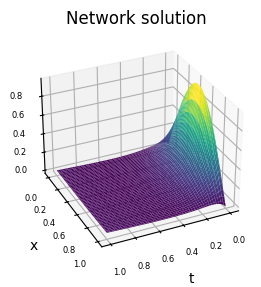

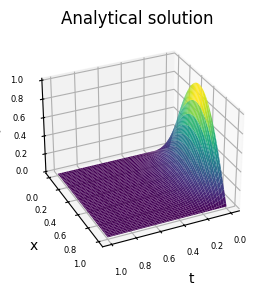

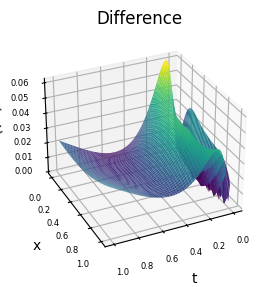

In [4]:
TFNetwork.plot_results()